Visualization for Peers
===========
# Jonishuxi (if I recall correctly)
* ## Joshua Allen
* ## Shuihui Tang
* ## Xingxing Zhang
* ## Nihali Jain
### Data Vis IS590

The data set is named Lahman’s Baseball Database and it can be find in seanlahman.com. The URL is http://seanlahman.com/baseball-archive/statistics/

The database contains complete batting and pitching statistics from 1871 to 2018, plus fielding statistics, standings, team stats, managerial records, post-season data, FieldingOFsplit, Parks, HomeGames, and more.It includes data from the two current leagues (American and National), the four other "major" leagues (American Association, Union Association, Players League, and Federal League), and the National Association of 1871-1875. The database can be used on any platform, but please be aware that this is not a standalone application. It is a database that requires Microsoft Access or some other relational database software to be useful.

The database has 28 csv files and most of them have more than 5000 records and the biggest one has more than a hundred thousand rocords.

### Limited Use License
This database is copyright 1996-2018 by Sean Lahman.

This work is licensed under a Creative Commons Attribution-ShareAlike 3.0 Unported License.  For details see: http://creativecommons.org/licenses/by-sa/3.0/

Thanks to Ted Turocy of the Chadwick Baseball Bureau, who did the heavy lifting to make the 2016 update possible. Ted also hosts a version of the data at github, for folks who are inclined to interface with it that way. Mike Webb created the SQL version.

In [1]:
%matplotlib inline
import traitlets
import pandas as pd
import bqplot
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.stats as stats
from scipy.stats.stats import pearsonr
import glob
import os
import seaborn as sns
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import collections

# Xingxing Zhang

### Firstly, I picked two tables named Pitching and PitchingPost, which have the same variables and data structure. 

In [2]:
# Pick Pitching.csv and PitchingPost.csv
pitching = pd.read_csv("/home/jallen17/baseball_data/Pitching.csv")
pitchingpost = pd.read_csv("/home/jallen17/baseball_data/PitchingPost.csv")

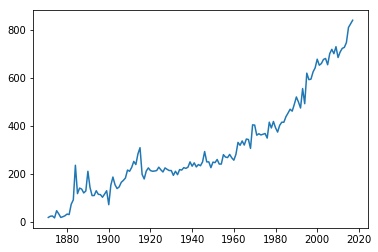

In [3]:
# plot the tendency of the total win and the year.
c = pitching.loc[:,["yearID","W"]]
d = pitchingpost.loc[:,["yearID","W"]]
Pitching_W = c.groupby("yearID")["W"].count()
PitchingPost_W = d.groupby("yearID")["W"].count()
plt.plot(Pitching_W, label = "Pitching W" );

### As the graphic shows above, we can find that these teams' win rates are notable decrease when they are in the post season.

In [7]:
b = pd.read_csv("/home/jallen17/baseball_data/PitchingPost.csv")


In [9]:
PitchingPost = pd.read_csv("/home/jallen17/baseball_data/PitchingPost.csv") 
salaries = pd.read_csv("/home/jallen17/baseball_data/Salaries.csv").loc[:,["playerID","salary"]]
data3 = pd.merge(PitchingPost,salaries)
data4 = data3.groupby(["playerID"])

In [ ]:
# plot the relationship among every performance variables and salary.
sns.set(style='whitegrid', context='notebook')
cols = ['W', 'L', 'G', 'SHO',
              'SV', 'H', 'WP', 'HBP', 'BK',
              'BFP', 'SH', 'SF', 'GIDP', 'salary']
sns.pairplot(data3[cols], size=1.5)

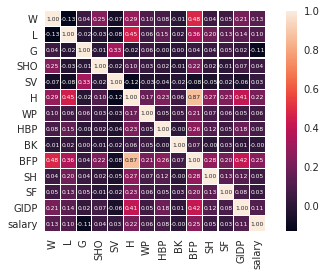

In [12]:
# create a heatmap to show the correlation among each performance variable and salary.
cm = np.corrcoef(data3[cols].values.T) 
sns.set(font_scale=1)

hm = sns.heatmap(cm,
        annot=True,
        square=True,
        fmt='.2f',
        annot_kws={'size': 6},
        linewidths = 0.05,
        yticklabels=cols,
        xticklabels=cols)
plt.rcParams["figure.dpi"] = 2000
plt.tight_layout()

#### As the graphic shows above, we can find that the performance only have very little relationship with salary.


### And then I picked another data set named Salaries, it has the special variable--salary for each player.

In [ ]:
salaries = pd.read_csv("/home/jallen17/baseball_data/Salaries.csv")
salaries.dtypes

### Here is the detail about the variables.

yearID         Year

teamID         Team

lgID           League

playerID       Player ID code

salary         Salary

In [ ]:
salaries.groupby("yearID")["salary"].mean().plot();

### As the graphic shows above, the mean of salaries are increased by years.

In [ ]:
# Deal with the dataset of salaries and get a new dataset-drawPlot.
salaries = pd.read_csv("/home/jallen17/baseball_data/Salaries.csv")
a = salaries.loc[:,["yearID","lgID","salary"]]
drawPlot = a.groupby(["yearID", 'lgID']).mean()["salary"].unstack()
drawPlot.head()

In [ ]:
salaries = pd.read_csv("/home/jallen17/baseball_data/Salaries.csv")
# plot each lg 's average salary among each year.
a = salaries.loc[:,["yearID","lgID","salary"]]
drawPlot = a.groupby(["yearID", 'lgID']).mean()["salary"].unstack()
d = {}
d = {"AL" : 'b', "NL" : 'r'}
def f(lgID):
    if(lgID=="none"):
        plt.plot(drawPlot["AL"], 'b', drawPlot["NL"], "r")
    else:
        plt.plot(drawPlot[lgID],d[lgID])

interact(f,lgID={"None": "none", "AL":"AL", "NL": "NL"})
plt.rcParams["figure.dpi"] = 100

### As the graphic shows above, we can find that after 2005, AL had the better salary than NL.

### In the third part, I try to find some relationships between the data set of Teams and the data set of Salaries.

In [ ]:
teams = pd.read_csv("/home/jallen17/baseball_data/Teams.csv")
teams.head()

In [ ]:
teams.dtypes

### Here is the detail about the variables.

yearID         Year

lgID           League

teamID         Team

franchID       Franchise (links to TeamsFranchise table)

divID          Team's division

Rank           Position in final standings

G              Games played

GHome          Games played at home

W              Wins

L              Losses

DivWin         Division Winner (Y or N)

WCWin          Wild Card Winner (Y or N)

LgWin          League Champion(Y or N)

WSWin          World Series Winner (Y or N)

R              Runs scored

AB             At bats

H              Hits by batters

2B             Doubles

3B             Triples

HR             Homeruns by batters

BB             Walks by batters

SO             Strikeouts by batters

SB             Stolen bases

CS             Caught stealing

HBP            Batters hit by pitch

SF             Sacrifice flies

RA             Opponents runs scored

ER             Earned runs allowed

ERA            Earned run average

CG             Complete games

SHO            Shutouts

SV             Saves

IPOuts         Outs Pitched (innings pitched x 3)

HA             Hits allowed

HRA            Homeruns allowed

BBA            Walks allowed

SOA            Strikeouts by pitchers

E              Errors

DP             Double Plays

FP             Fielding  percentage

name           Team's full name

park           Name of team's home ballpark

attendance     Home attendance total

BPF            Three-year park factor for batters

PPF            Three-year park factor for pitchers

teamIDBR       Team ID used by Baseball Reference website

teamIDlahman45 Team ID used in Lahman database version 4.5

teamIDretro    Team ID used by Retrosheet

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact
# plot each rank 's average salary among each year.
teams = pd.read_csv("/home/jallen17/baseball_data/Teams.csv")
salary = pd.read_csv("/home/jallen17/baseball_data/Salaries.csv")
data1 = pd.merge(teams,salary)[["yearID", "teamID", "Rank", "salary"]]
data5 = data1.groupby(["yearID", "Rank"])["salary"].mean().unstack()
data5.columns = ['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5', 'Rank 6', 'Rank 7']
d = {}
d = {"Rank 1" : 'b', "Rank 2" : 'c',"Rank 3" : 'g',"Rank 4":'m',"Rank 5":'y','Rank 6':'r','Rank 7' :'k'}
def f(Rank):
    if(Rank=="none"):
        plt.plot(data5["Rank 1"], 'b', data5["Rank 2"], 'c', data5["Rank 3"], 'g', data5["Rank 4"], 'm', data5["Rank 5"], 'y',
                 data5['Rank 6'],'r', data5['Rank 7'],'k')
    else:
        plt.plot(data5[Rank], d[Rank])
        
    plt.legend([Rank],loc='upper left')
    
interact(f,Rank={"None":"none", "Rank 1": "Rank 1","Rank 2":'Rank 2',"Rank 3": 'Rank 3',"Rank 4":'Rank 4',
                 "Rank 5":'Rank 5',"Rank 6":"Rank 6","Rank 7":"Rank 7"})

plt.rcParams["figure.dpi"] = 200

#### As the graphic shows above, we can find that, in general, the team in higher rank, the players can get higher salary in that team.

# Joshua Allen

In [ ]:
batting = pd.read_csv('/home/jallen17/baseball_data/Batting.csv')
post_batting = pd.read_csv('/home/jallen17/baseball_data/BattingPost.csv')

## Interactive Hexbin

For a first pass at the post-season OPS v regular season OPS data, I made a hexbin plot with interactions that allow you to select an OPS range and date range. The OPS range is set to show all values at the lowest end, beyond that it shows ranges that coincide with Bill James categories of hitter abilities:

| Category | Classification | OPS Range       |
|----------|----------------|-----------------|
| A        | Great          | .9000 or higher |
| B        | Very Good      | .8333 to .8999  |
| C        | Above Average  | .7667 to .8333  |
| D        | Average        | .7000 to .7666  |
| E        | Below Average  | .6334 to .6999  |
| F        | Poor           | .5667 to .6333  |
| G        | Very Poor      | .5666 and lower |

For the years, the lowest setting shows all years, and beyond that it shows the decade before the shown date, so 1990 shows the data from the '90s. Histograms show the distribution of the OPS values in the regular season and post-season. Only regular season for players who appeared in the post-season is shown. Almost all the data processing had to be done within the object because of the way the data processing had to proceed.

In [ ]:
@ipywidgets.interact(level = (0.5666, 1, .0666), year = (1910, 2020, 10))
def plot(level = .5666, year = 1910):
    if year == 1910:
        post_season=post_batting
    elif level == 1920:
        post_season = post_batting.loc[post_batting['yearID'] < year]
    else:
        post_season = post_batting.loc[(post_batting['yearID'] > year-10) & (post_batting['yearID'] <= year)]
    reg_season = batting.set_index(['playerID', 'yearID'])
    post_season = post_season.set_index(['playerID', 'yearID'])
    reg_season = reg_season.groupby(['playerID', 'yearID']).sum()
    post_season = post_season.groupby(['playerID', 'yearID']).sum()
    reg_season = reg_season.loc[reg_season.AB >= 12]
    post_season = post_season.loc[post_season.AB >= 12]
    reg_season['OBP'] = (reg_season['H'] + reg_season['BB'] + reg_season['HBP']) / (reg_season['AB'] + reg_season['BB'] + reg_season['HBP'] + reg_season['SF'])
    reg_season['Slug'] = ((reg_season['H']-reg_season['2B']-reg_season['3B']-reg_season['HR']) + (2*reg_season['2B']) + (3*reg_season['3B']) + (4*reg_season['HR']))/reg_season['AB']
    reg_season['OPS'] = reg_season['OBP'] + reg_season['Slug']
    post_season['OBP'] = (post_season['H'] + post_season['BB'] + post_season['HBP']) / (post_season['AB'] + post_season['BB'] + post_season['HBP'] + post_season['SF'])
    post_season['Slug'] = ((post_season['H']-post_season['2B']-post_season['3B']-post_season['HR']) + (2*post_season['2B']) + (3*post_season['3B']) + (4*post_season['HR']))/post_season['AB']
    post_season['OPS'] = post_season['OBP'] + post_season['Slug']
    post_season.rename(columns={'OPS': 'postOPS'}, inplace=True)
    post_season_OPS = pd.DataFrame(post_season.loc[:, 'postOPS'])
    reg_season_OPS = pd.DataFrame(reg_season.loc[:, 'OPS'])
    OPS_table = post_season_OPS.join(reg_season_OPS)
    OPS_table = OPS_table.fillna(0)
    
    if level == 0.5666:
        OPS_table = OPS_table
    elif level >= 0.8334:
        OPS_table = OPS_table.loc[(OPS_table.OPS > 0.8999) & (OPS_table.OPS < 2)]
    else:
        OPS_table = OPS_table.loc[(OPS_table.OPS  > level) & (OPS_table.OPS <= level+0.666)]
    
    x = OPS_table.loc[:, 'OPS']
    y = OPS_table.loc[:, 'postOPS']
    ax1 = plt.axes([0.0, 0.0, 1.0, 1.0])
    ax2 = plt.axes([1.0, 0.0, 0.25, 1.0], sharey = ax1)
    ax3 = plt.axes([0.0, 1.0, 1.0, 0.25], sharex = ax1)

    gridsize = 64

    ax1.hexbin(x, y, bins = 'log', gridsize = gridsize)
    ax2.hist(y, orientation='horizontal', bins = gridsize)
    ax2.set_frame_on(False)
    ax3.hist(x, orientation='vertical', bins = gridsize)
    ax3.set_frame_on(False)
    ax1.set_xlabel("Regular season OPS", fontsize="18")
    ax1.set_ylabel("Post-season OPS", fontsize="18")
    ax2.tick_params(axis='y', which='both', right='off', left='off', labelleft='off')
    ax3.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax3.set_title("Reg season OPS v Post-season OPS", fontsize="24");


In [ ]:
reg_season = batting.set_index(['playerID', 'yearID'])
post_season = post_batting.loc[post_batting['yearID'] > 1903]
post_season = post_season.set_index(['playerID', 'yearID'])
reg_season = reg_season.groupby(['playerID', 'yearID']).sum()
post_season = post_season.groupby(['playerID', 'yearID']).sum()
post_season = post_season.loc[post_season.AB >= 12]
reg_season['OBP'] = (reg_season['H'] + reg_season['BB'] + reg_season['HBP']) / (reg_season['AB'] + reg_season['BB'] + reg_season['HBP'] + reg_season['SF'])
reg_season['Slug'] = ((reg_season['H']-reg_season['2B']-reg_season['3B']-reg_season['HR']) + (2*reg_season['2B']) + (3*reg_season['3B']) + (4*reg_season['HR']))/reg_season['AB']
reg_season['OPS'] = reg_season['OBP'] + reg_season['Slug']
post_season['OBP'] = (post_season['H'] + post_season['BB'] + post_season['HBP']) / (post_season['AB'] + post_season['BB'] + post_season['HBP'] + post_season['SF'])
post_season['Slug'] = ((post_season['H']-post_season['2B']-post_season['3B']-post_season['HR']) + (2*post_season['2B']) + (3*post_season['3B']) + (4*post_season['HR']))/post_season['AB']
post_season['OPS'] = post_season['OBP'] + post_season['Slug']
post_season.rename(columns={'OPS': 'postOPS'}, inplace=True)
post_season_OPS = pd.DataFrame(post_season.loc[:, 'postOPS'])
reg_season_OPS = pd.DataFrame(reg_season.loc[:, 'OPS'])
OPS_table = post_season_OPS.join(reg_season_OPS)
OPS_table = OPS_table.fillna(0)
x = OPS_table.loc[:, 'OPS']
y = OPS_table.loc[:, 'postOPS']

## Gaussian KDE

For the next attempt, I tried using a gaussian kernel density estimate on the data. Basically, it estimates the gaussian density and turns that into a z-direction, then the plot flattens that back down into two dimensions. It's similar to a scatter plot, but overlays a density estimate to show where the data is most numerous, giving a way to visualize a dense scatter of data. The size feature (s=...) is similar to the gridsize feature in the hexbin, except in reverse.
(based on https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html)

In [ ]:
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50, edgecolor='')
plt.show()

## Gaussian KDE + interactivity

For the final plot, I combined the above two methods to do the gaussian kde method coupled with the interactive method of the hexbin plot.

In [ ]:
@ipywidgets.interact(level = (0.5666, 1, .0666), year = (1910, 2020, 10))
def plot(level = .5666, year = 1910):
    if year == 1910:
        post_season=post_batting
    elif level == 1920:
        post_season = post_batting.loc[post_batting['yearID'] < year]
    else:
        post_season = post_batting.loc[(post_batting['yearID'] > year-10) & (post_batting['yearID'] <= year)]
    reg_season = batting.set_index(['playerID', 'yearID'])
    post_season = post_season.set_index(['playerID', 'yearID'])
    reg_season = reg_season.groupby(['playerID', 'yearID']).sum()
    post_season = post_season.groupby(['playerID', 'yearID']).sum()
    reg_season = reg_season.loc[reg_season.AB >= 12]
    post_season = post_season.loc[post_season.AB >= 12]
    reg_season['OBP'] = (reg_season['H'] + reg_season['BB'] + reg_season['HBP']) / (reg_season['AB'] + reg_season['BB'] + reg_season['HBP'] + reg_season['SF'])
    reg_season['Slug'] = ((reg_season['H']-reg_season['2B']-reg_season['3B']-reg_season['HR']) + (2*reg_season['2B']) + (3*reg_season['3B']) + (4*reg_season['HR']))/reg_season['AB']
    reg_season['OPS'] = reg_season['OBP'] + reg_season['Slug']
    post_season['OBP'] = (post_season['H'] + post_season['BB'] + post_season['HBP']) / (post_season['AB'] + post_season['BB'] + post_season['HBP'] + post_season['SF'])
    post_season['Slug'] = ((post_season['H']-post_season['2B']-post_season['3B']-post_season['HR']) + (2*post_season['2B']) + (3*post_season['3B']) + (4*post_season['HR']))/post_season['AB']
    post_season['OPS'] = post_season['OBP'] + post_season['Slug']
    post_season.rename(columns={'OPS': 'postOPS'}, inplace=True)
    post_season_OPS = pd.DataFrame(post_season.loc[:, 'postOPS'])
    reg_season_OPS = pd.DataFrame(reg_season.loc[:, 'OPS'])
    OPS_table = post_season_OPS.join(reg_season_OPS)
    OPS_table = OPS_table.fillna(0)
    
    if level == 0.5666:
        OPS_table = OPS_table
    elif level >= 0.8334:
        OPS_table = OPS_table.loc[(OPS_table.OPS > 0.8999) & (OPS_table.OPS < 2)]
    else:
        OPS_table = OPS_table.loc[(OPS_table.OPS  > level) & (OPS_table.OPS <= level+0.666)]
    
    x = OPS_table.loc[:, 'OPS']
    y = OPS_table.loc[:, 'postOPS']
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    fig, ax = plt.subplots()
    ax.scatter(x, y, c=z, s=100, edgecolor='')
    plt.show()

## Shuhui Tang

In [ ]:
salary = pd.read_csv("/home/jallen17/baseball_data/Salaries.csv")
fielding = pd.read_csv("/home/jallen17/baseball_data/Fielding.csv")

We want to combine "salary" and "fielding" these two datasets together in one dataframe. Because in Part 1, We already 
explored two datasets and found out that they both have "playerID" and "yearID", then we can merge them and create a new dataset with only four colums.
We want to show the changing of average salary at different positions with year changing. In order to make some interactivity, we want to use the dropdown to select average salary changing by positions.

In [ ]:
player_position = pd.merge(salary, fielding, on = ["playerID","yearID"])[["yearID", "playerID", "salary", "POS"]]

In [ ]:
data = player_position.groupby(["yearID", "POS"]).mean()["salary"].unstack()
d = {}
d = {"1B" : 'b-', "2B" : 'c-',"3B" : 'g-',"OF":'g--',"SS":'y-',"P":'r-',"C" :'k-'}
#l=["1B",'2B','3B','OF','SS',"P","C"]
def f(n):
    
    if(n=="all"):
        plt.plot(data["1B"], 'b-', data["2B"], 'c-', data["3B"], 'g-', data["OF"], 'g--', data["SS"], 'y-', data['P'],'r-', data['C'],'k-')
    else:
        plt.plot(data[n],d[n])
    plt.xlabel(r"$\mathrm{Year}$")
    plt.ylabel(r"$\mathrm{Salary}$")
    plt.legend([n],loc='upper left')

interact(f,n={"First Base":"1B","Second Base":'2B',"Third Base":'3B',"Field":'OF',"Short Stop":'SS',"Pitcher":"P","Catcher":"C","All position":"all"});


## Nihali Jain

## First, taking Salary data stored in Salaries.csv to see the percentage change in total salary of all the employees over the time.

In [ ]:
salaries=pd.read_csv("/home/jallen17/baseball_data//Salaries.csv")


In [ ]:
yearly_totalavg_salary = salaries.groupby('yearID').mean()

In [ ]:
yearly_percent_change = ((yearly_totalavg_salary - yearly_totalavg_salary.iloc[0]) / yearly_totalavg_salary.iloc[0]) * 100.0
yearly_percent_change.plot()
plt.title('Percentage change in salary during the time')
plt.ylabel('Percent Change')
plt.xlabel('Year')

From the above plot we can see that the yearly total average salary (for Major Leagues in the game of Baseball from 1871 through 2012) has observed an increasing trend over the years.

## Now we will try to see the distribution of each player's salary over the years (interactive plot)

In [ ]:
players = salaries.loc[salaries['yearID'] > 1903]['playerID'].unique().tolist()
@ipywidgets.interact(player = players)
def plot(player = 'ackerji01'):
   player_salary = pd.DataFrame(salaries.groupby(['yearID', 'playerID']).sum()['salary'])
   player_salary = player_salary.reset_index()
   y = player_salary.loc[player_salary['playerID'] == player]
   plt.plot(y['yearID'], y['salary'],'ro')
   plt.title('Salary Plot by Players')
   plt.xlabel('Year')
   plt.ylabel('Salary')
   

With the help of added interactivity in the above plot, the user can choose different players according to their choice of interest in order to see the corresponding distribution of their Salary over the years. 

## Second, taking team data stored in Teams.csv to see the teams (their counts and name) that played only once during the whole period (1871 through 2012).

In [ ]:
teams=pd.read_csv("/home/jallen17/baseball_data//Teams.csv")

In [ ]:
teams.head()

In [ ]:
unique, counts = np.unique(teams['teamID'], return_counts=True)

In [ ]:
collections.Counter(counts[counts==1])

So, there are a total of 57 teams that played only once since 1871 till 2012. now, following are the names of those 57 teams:

In [ ]:
l=unique[counts==1]
a=[]
for i in teams.teamID:
    for y in np.arange(56):
        if i==l[y]:
            
            a.append(teams.name[teams.teamID==i])
l=[]            
for i in np.arange(56):
    l.append(np.array(a[i]))
    print(l[i])

## Wins over the years

In [ ]:
Wins=pd.read_csv("/home/jallen17/baseball_data//Pitching.csv")

Following hexbin plot shows the Wins over the years for Major Leagues in the game of Baseball from 1871 through 2012. From the below plot we can see that the number of Wins has decreased over the years (from 1871 through 2012).

In [ ]:
plt.hexbin(Wins['yearID'], Wins['W'], gridsize=64, bins='log')
plt.title('Wins Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

## Now we will try to plot the  Wins over the years for different teams (interactive plot)

In [ ]:
teams = Wins.loc[Wins['yearID'] > 1903]['teamID'].unique().tolist()
@ipywidgets.interact(team = teams)
def plot(team = 'CHN'):
   team_wins = pd.DataFrame(Wins.groupby(['teamID', 'yearID']).sum()['W'])
   team_wins = team_wins.reset_index()
   y = team_wins.loc[team_wins['teamID'] == team]
   plt.scatter(y['yearID'], y['W'])
   plt.title('Wins Plot')
   plt.xlabel('Year')
   plt.ylabel('Wins')

Added interactivity so that the user can choose their team of interest in order to see the corresponding distribution of their wins over the years. 

## Distribution of maximum and minimum total salaries in each year

In [ ]:
stats = salaries.groupby("yearID")["salary"].describe()
plt.plot(stats["min"], marker = '.', linewidth = 1.0, label="min")
plt.plot(stats["max"], marker = '.', linewidth = 1.0, label="max")
plt.fill_between(stats.index, stats["min"], stats["max"], color = "#ddddd1")
plt.xlabel(r"$\mathrm{Year}$")
plt.ylabel("Salary")
plt.yscale("log")
plt.legend()

## Adding some interactivity to above plot

In [ ]:
eachYear = salaries.loc[salaries['yearID'] > 1903]['yearID'].unique().tolist()

@ipywidgets.interact(plotyear = eachYear)
def plot(plotyear = 1985):
    s = pd.DataFrame(stats.groupby(['yearID']).sum())

    s= s.reset_index()
    y = s.loc[s['yearID'] == plotyear]
    plt.plot(y["min"], marker="o",  markersize=5, label="min")
    plt.plot(y["max"], marker="o",  markersize=5, label="max")
    plt.fill_between(y.index, y["min"], y["max"], color = "#ddddd1")

    plt.xlabel(r"$\mathrm{Year}$")
    plt.ylabel("Salary")

    plt.legend()
    max_sal = int(y['max'])
    min_sal = int(y['min'])
    label.value = "Max salary for %s is %s" % (plotyear, max_sal)
   
display(label)
    